# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | vila velha
Processing Record 3 of Set 1 | tiassale
Processing Record 4 of Set 1 | nouadhibou
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | kirkwall
Processing Record 7 of Set 1 | kiunga
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | stephenville
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | vilyuchinsk
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | gadzhiyevo
Processing Record 14 of Set 1 | chos malal
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | harstad
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | jagtial
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | dudinka
Processing Record 22 of Set 1 | afaahiti

Processing Record 45 of Set 4 | jamaame
Processing Record 46 of Set 4 | sao vicente
Processing Record 47 of Set 4 | shingu
Processing Record 48 of Set 4 | vadstena
Processing Record 49 of Set 4 | pirai do sul
Processing Record 0 of Set 5 | bovril
Processing Record 1 of Set 5 | blairgowrie
Processing Record 2 of Set 5 | villa canas
Processing Record 3 of Set 5 | marsabit
Processing Record 4 of Set 5 | rouissat
Processing Record 5 of Set 5 | hasaki
Processing Record 6 of Set 5 | phan rang-thap cham
Processing Record 7 of Set 5 | pedernales
Processing Record 8 of Set 5 | mahabe
City not found. Skipping...
Processing Record 9 of Set 5 | akureyri
Processing Record 10 of Set 5 | ilebo
Processing Record 11 of Set 5 | fomboni
Processing Record 12 of Set 5 | bac lieu
Processing Record 13 of Set 5 | kone
Processing Record 14 of Set 5 | luohe
Processing Record 15 of Set 5 | kholmsk
Processing Record 16 of Set 5 | sinabang
Processing Record 17 of Set 5 | tahe
Processing Record 18 of Set 5 | verkhn

Processing Record 35 of Set 8 | swakopmund
Processing Record 36 of Set 8 | san antonio de pale
Processing Record 37 of Set 8 | villa gesell
Processing Record 38 of Set 8 | katsuura
Processing Record 39 of Set 8 | kumbhraj
Processing Record 40 of Set 8 | bikenibeu village
Processing Record 41 of Set 8 | basco
Processing Record 42 of Set 8 | gorom-gorom
Processing Record 43 of Set 8 | zadar
Processing Record 44 of Set 8 | dadukou
Processing Record 45 of Set 8 | antofagasta
Processing Record 46 of Set 8 | rio san juan
Processing Record 47 of Set 8 | bintulu
Processing Record 48 of Set 8 | micheweni
Processing Record 49 of Set 8 | cable beach
City not found. Skipping...
Processing Record 0 of Set 9 | takamaka
City not found. Skipping...
Processing Record 1 of Set 9 | bamboo flat
Processing Record 2 of Set 9 | parauapebas
Processing Record 3 of Set 9 | verkhovazh'ye
Processing Record 4 of Set 9 | whangarei
Processing Record 5 of Set 9 | srivardhan
Processing Record 6 of Set 9 | de aar
Proce

Processing Record 24 of Set 12 | aegina
Processing Record 25 of Set 12 | tokar
Processing Record 26 of Set 12 | dikili
Processing Record 27 of Set 12 | ubinskoye
Processing Record 28 of Set 12 | olyokminsk
Processing Record 29 of Set 12 | tapes
Processing Record 30 of Set 12 | guararapes
Processing Record 31 of Set 12 | bodaybo
Processing Record 32 of Set 12 | tharyarwady
Processing Record 33 of Set 12 | robore
Processing Record 34 of Set 12 | nichinan
Processing Record 35 of Set 12 | severnoye
Processing Record 36 of Set 12 | sultanah
Processing Record 37 of Set 12 | 'ohonua
City not found. Skipping...
Processing Record 38 of Set 12 | korhogo
Processing Record 39 of Set 12 | manakara
Processing Record 40 of Set 12 | datong
Processing Record 41 of Set 12 | mandal
Processing Record 42 of Set 12 | menaka
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,3.22,88,48,1.98,GS,1698593041
1,vila velha,-20.3297,-40.2925,31.97,51,0,7.20,BR,1698592958
2,tiassale,5.8983,-4.8283,31.00,60,58,0.84,CI,1698593042
3,nouadhibou,20.9310,-17.0347,25.99,65,0,6.69,MR,1698593043
4,isafjordur,66.0755,-23.1240,1.02,80,0,0.00,IS,1698592810


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,3.22,88,48,1.98,GS,1698593041
1,vila velha,-20.3297,-40.2925,31.97,51,0,7.20,BR,1698592958
2,tiassale,5.8983,-4.8283,31.00,60,58,0.84,CI,1698593042
3,nouadhibou,20.9310,-17.0347,25.99,65,0,6.69,MR,1698593043
4,isafjordur,66.0755,-23.1240,1.02,80,0,0.00,IS,1698592810


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

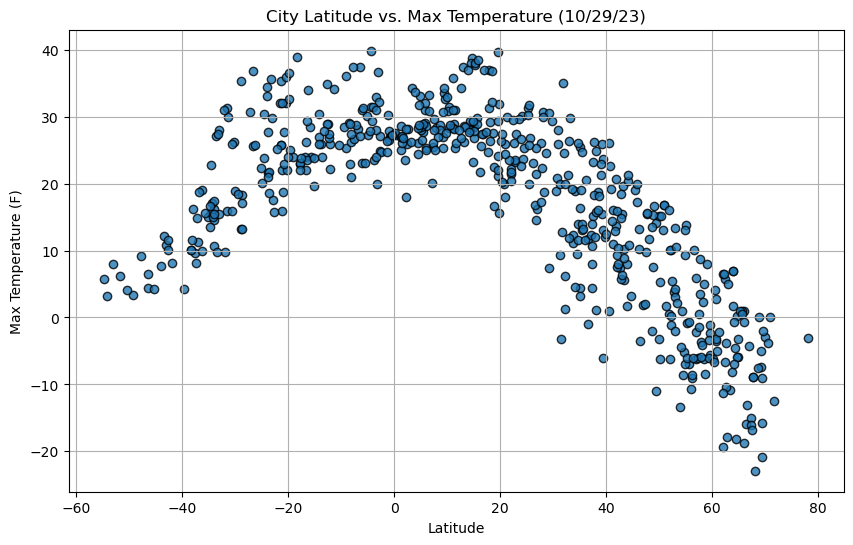

In [10]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

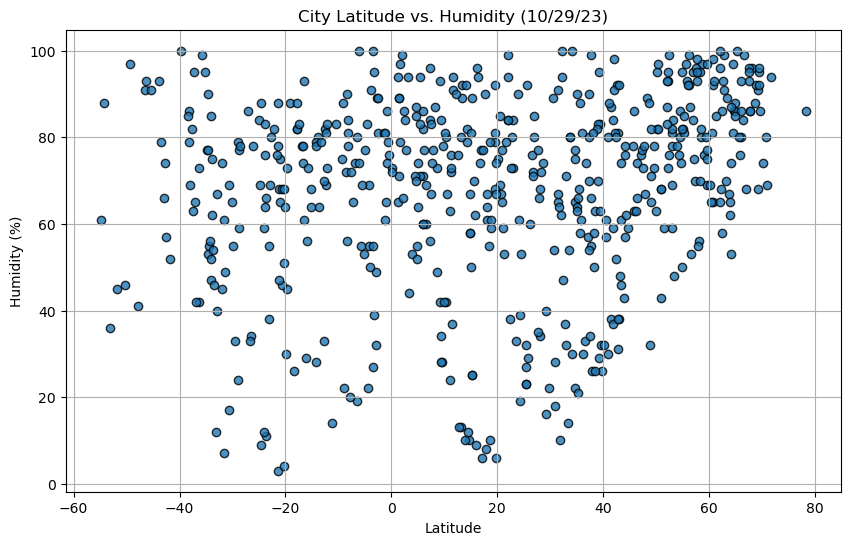

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

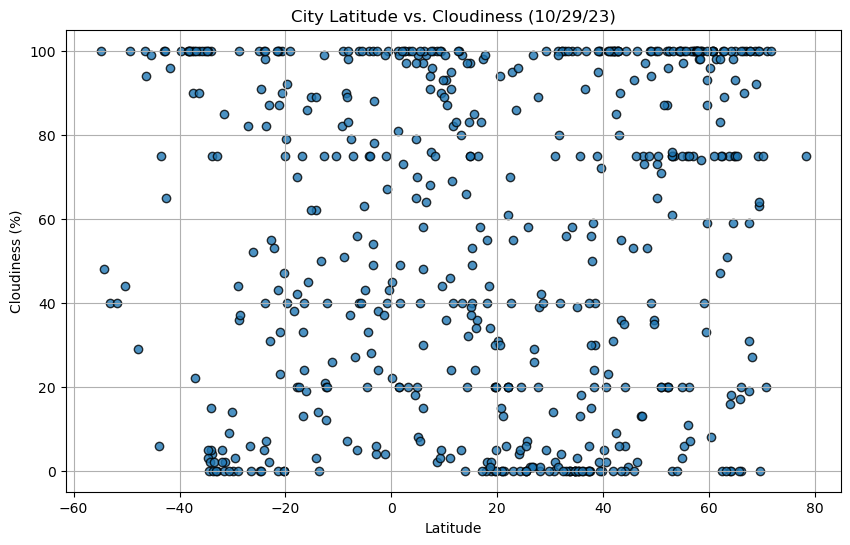

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

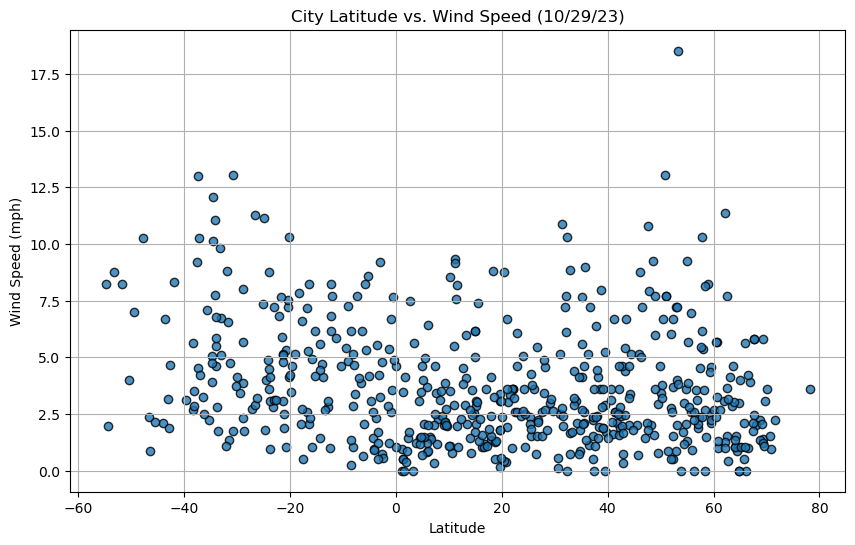

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    """
    Create a scatter plot with linear regression.
    x_values, y_values : data for the scatter plot
    title : title of the plot
    text_coordinates : coordinates to display the linear regression equation
    """
    
    # Compute linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Latitude')
    
    # Print r-value
    print(f"The r-value is: {r_value**2}")

    plt.show()



In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tiassale,5.8983,-4.8283,31.00,60,58,0.84,CI,1698593042
3,nouadhibou,20.9310,-17.0347,25.99,65,0,6.69,MR,1698593043
4,isafjordur,66.0755,-23.1240,1.02,80,0,0.00,IS,1698592810
5,kirkwall,58.9848,-2.9587,8.03,76,40,8.23,GB,1698593044
7,wailua homesteads,22.0669,-159.3780,21.44,84,20,3.60,US,1698593044


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,3.22,88,48,1.98,GS,1698593041
1,vila velha,-20.3297,-40.2925,31.97,51,0,7.20,BR,1698592958
6,kiunga,-6.1219,141.2906,23.04,100,100,0.65,PG,1698593044
11,invercargill,-46.4000,168.3500,4.45,93,94,0.89,NZ,1698593045
13,chos malal,-37.3781,-70.2709,8.12,63,90,13.01,AR,1698593046


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7532007106794653


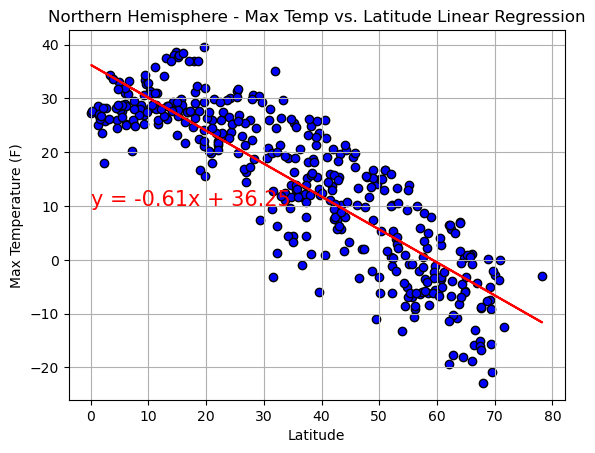

In [18]:
# Linear regression on Northern Hemisphere

# Extract relevant fields from the DataFrame for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create a scatter plot and plot the regression line
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.plot(x_values, regress_values, "r-")

# Annotate the text for the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (0,10), fontsize=15, color="red")

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Print out the r-value
print(f"The r-value is: {rvalue**2}")

# Display the plot
plt.show()


The r-value is: 0.5363860844113751


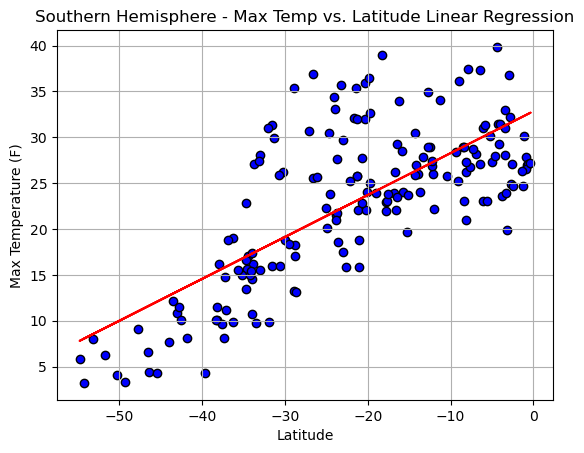

In [19]:
# Linear regression on Southern Hemisphere

# Extract relevant fields from the DataFrame for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create a scatter plot and plot the regression line
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.plot(x_values, regress_values, "r-")

# Annotate the text for the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-55,90), fontsize=15, color="red")

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Print out the r-value
print(f"The r-value is: {rvalue**2}")

# Display the plot
plt.show()


**Discussion about the linear relationship:** 

1. The equator, which is at 0° latitude, is traditionally the warmest part of the world. Both graphs support this observation. In the Southern Hemisphere, temperatures increase as cities are closer to the equator, and in the Northern Hemisphere, temperatures decrease as cities move further away from the equator.

2. The steeper slope in the Northern Hemisphere plot compared to the Southern Hemisphere might suggest a more rapid decrease in temperature as one moves north during this time of the year. Factors influencing this could be the tilt of the Earth, ocean currents, altitude, and other geographical and seasonal factors.

3. I think it crucial to consider that the data is a snapshot of a specific time, and the relationship between latitude and temperature could vary depending on the season. For example, during the Southern Hemispheres winter months, the relationship might be noticeable.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.06828363649467589


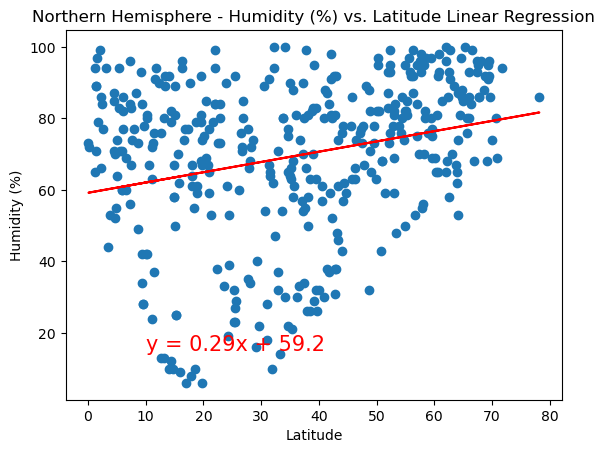

In [30]:
# Northern Hemisphere
# Assuming northern_hemi_df is the dataframe for Northern Hemisphere data
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create the scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (10,15), fontsize=15, color="red")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Show the plot
plt.show()

The r-squared is: 0.0006141852727008383


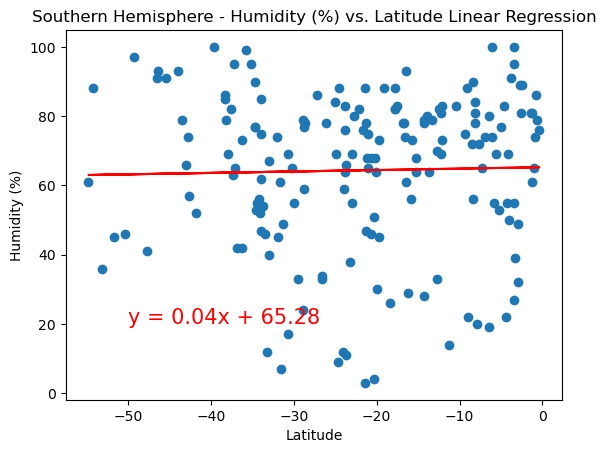

In [31]:
# Southern Hemisphere
# Assuming southern_hemi_df is the dataframe for Southern Hemisphere data
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create the scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** 



**1. Southern Hemisphere - Humidity (%) vs. Latitude:**

    a) The linear regression model for the Southern Hemisphere indicates a very slight positive correlation between latitude and humidity. As the latitude increases (approaching 0, which is the equator), the humidity tends to increase very marginally. The slope of the line, 0.04x, signifies this weak trend.
    
    b) However, the majority of the data points are scattered, suggesting a variety of other factors can influence humidity besides latitude.



**2. Northern Hemisphere - Humidity (%) vs. Latitude:**

    a) The linear regression model for the Northern Hemisphere indicates a moderate positive correlation between latitude and humidity. As the latitude increases (moving away from the equator), the humidity also tends to increase. This is evident from the steeper slope of 0.29x compared to the Southern Hemisphere.
    
    b) Though there's a clearer trend in the Northern Hemisphere compared to the Southern Hemisphere, there's still a significant scatter in the data points. This implies that while latitude might be a factor, other geographical and atmospheric conditions also play a substantial role in determining humidity.


While there are observable trends between humidity and latitude in both hemispheres, it's evident that latitude alone isn't the sole determinant of humidity. Local geographical features, ocean currents, wind patterns, and elevation can all play significant roles in influencing humidity levels in a given region.

### Cloudiness vs. Latitude Linear Regression Plot

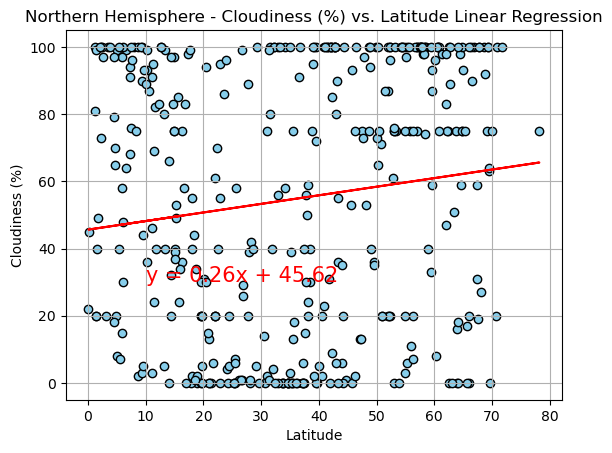

In [32]:
# Northern Hemisphere

# Assuming you have the northern_hemi_df already created
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plot
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,30), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.grid(True)
plt.show()


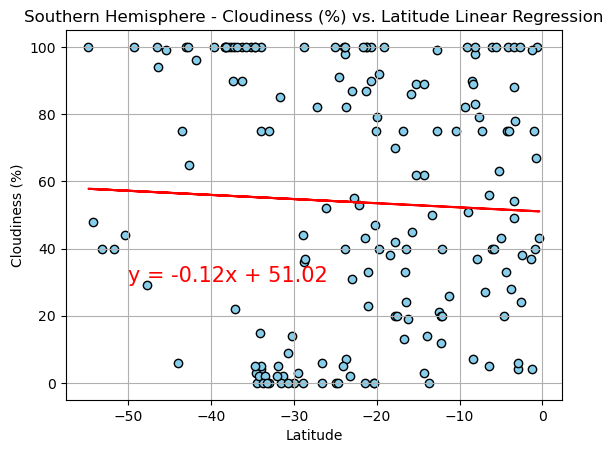

In [33]:
# Southern Hemisphere
# Assuming you have the southern_hemi_df already created
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plot
plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,30), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** 



Northern Hemisphere:
The linear regression line for the Northern Hemisphere has a positive slope (y = 0.26x + 45.62). This suggests a positive correlation between latitude and cloudiness, meaning that as one moves further north, there is a slight increase in cloudiness. However, it's important to note that the data points are widely spread out around the regression line. This indicates a weak correlation between latitude and cloudiness in the Northern Hemisphere.

Southern Hemisphere:
The linear regression line for the Southern Hemisphere has a negative slope (y = -0.12x + 51.02). This suggests a negative correlation between latitude and cloudiness, meaning that as one moves further south, there is a slight decrease in cloudiness. Yet, similar to the Northern Hemisphere, the data points are also spread out, indicating a weak correlation between these variables in the Southern Hemisphere.


Both hemispheres show weak correlations between latitude and cloudiness. Cloudiness seems to be influenced by many other factors, and while there is a slight trend in each hemisphere, latitude alone does not strongly determine cloudiness. It's possible that other factors, such as ocean currents, elevation, and local weather patterns, play a more significant role in determining cloudiness in a given region.


### Wind Speed vs. Latitude Linear Regression Plot

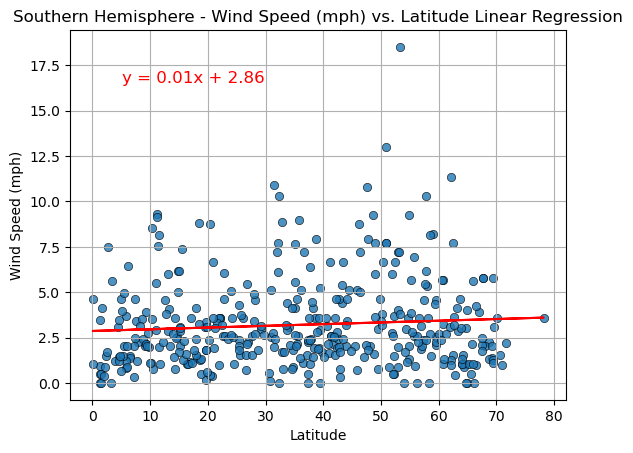

In [34]:
# Northern Hemisphere


latitude = northern_hemi_df['Lat']
wind_speed = northern_hemi_df['Wind Speed']

# Linear regression calculation
slope, intercept, r_value, p_value, std_err = linregress(latitude, wind_speed)
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create a scatter plot
plt.scatter(latitude, wind_speed, edgecolor="black", linewidth=0.5, alpha=0.8, label="Cities")

# Add the linear regression line
regress_values = slope * latitude + intercept
plt.plot(latitude, regress_values, "r-")
plt.annotate(line_eq, (min(latitude)+5, max(wind_speed)-2), fontsize=12, color="red")

# Title and labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.show()



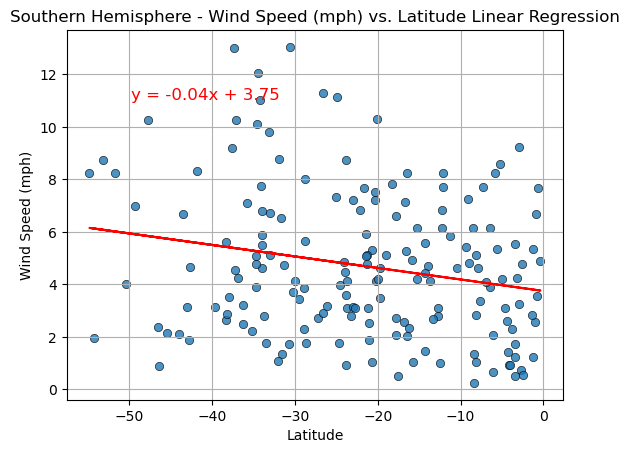

In [35]:
# Southern Hemisphere
latitude = southern_hemi_df['Lat']
wind_speed = southern_hemi_df['Wind Speed']

# Linear regression calculation
slope, intercept, r_value, p_value, std_err = linregress(latitude, wind_speed)
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create a scatter plot
plt.scatter(latitude, wind_speed, edgecolor="black", linewidth=0.5, alpha=0.8, label="Cities")

# Add the linear regression line
regress_values = slope * latitude + intercept
plt.plot(latitude, regress_values, "r-")
plt.annotate(line_eq, (min(latitude)+5, max(wind_speed)-2), fontsize=12, color="red")

# Title and labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.show()


**Discussion about the linear relationship:** 


Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (First Plot):
In the first plot (ranging from -50 to 0 degrees latitude), as the latitude increases (i.e., approaches the equator), the wind speed slightly decreases. The negative slope of the linear regression line, -0.04x, indicates a slight negative correlation between latitude and wind speed in the Southern Hemisphere. This suggests that cities closer to the South Pole tend to have slightly higher wind speeds compared to cities near the equator.

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (Second Plot):
This plot seems mislabeled as the latitude values range from 0 to 80, which would typically correspond to the Northern Hemisphere. However, taking it at face value, the slope of the regression line is 0.01x, which is very close to zero. This indicates a weak positive correlation between latitude and wind speed. In this scenario, wind speed doesn't change significantly with latitude. The data points are widely spread around the regression line, suggesting that other factors besides latitude likely influence wind speed in this region.

While the Southern Hemisphere shows a slight tendency for wind speeds to decrease as one approaches the equator, the "mislabeled" Southern Hemisphere plot shows little to no discernible trend between latitude and wind speed. This discrepancy could be due to various factors like geographical features, seasonal variations, or simply the mislabeling of the data.